In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
train = pd.read_csv("/home/vincent/Desktop/train.csv")
#test = pd.read_csv("/home/vincent/Desktop/test.csv")

In [3]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# var3: nationality of the customer

In [5]:
# Top-10 most common values
# 116 values in column var3 are -999999
# var3 is suspected to be the nationality of the customer
# -999999 would mean that the nationality of the customer is unknown
train.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [66]:
# Replace -999999 in var3 column with most common value 2 
train = train.replace(-999999, value=2)

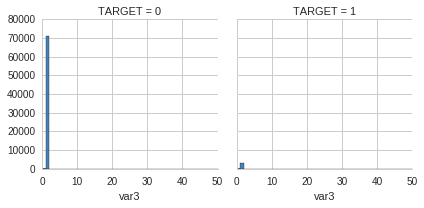

var3 == 2占整个样本的比例为 : 97.71%


In [71]:
g = sns.FacetGrid(train, col="TARGET", margin_titles=True)
bins = np.linspace(0, 50, 50)
g.map(plt.hist, "var3", color="steelblue", bins=bins)
plt.show()
print('var3 == 2占整个样本的比例为 : {:.2%}'.format(train.loc[train.var3 == 2].shape[0] / train.shape[0]))

从上面显示的结果我们可以看到var3 == 2几近占据了全部的样本，并且基本上全在类别0中，表面上看起来var3具有很强的预测能力。

In [72]:
# happy customers have TARGET==0, unhappy custormers have TARGET==1
# A little less then 4% are unhappy => unbalanced dataset
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


从上表统计的数据来看，类别1连4%都不到，这说明类别是严重偏斜的，因此var3并没有很强的预测能力。

# Add feature that counts the number of zeros in a row

In [74]:
X = train.iloc[:, : - 1]
y = train.TARGET

X['n0'] = (X == 0).sum(axis = 1)
train['n0'] = X['n0']

# num_var4 : number of bank products

In [84]:
num_var4_value_counts = train.num_var4.value_counts()
num_var4_value_counts

1    38147
0    19528
2    12692
3     4377
4     1031
5      203
6       36
7        6
Name: num_var4, dtype: int64

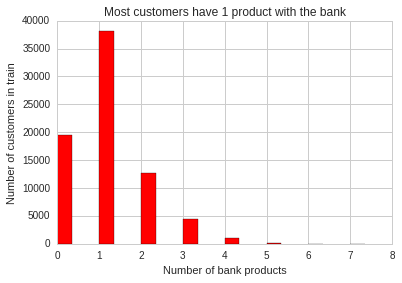

In [106]:
ind, counts = np.unique(train.num_var4, return_counts=True)

p1 = plt.bar(ind, counts, 0.35, color='r')
plt.xlabel('Number of bank products')
plt.ylabel('Number of customers in train')
plt.title('Most customers have 1 product with the bank')
plt.show()

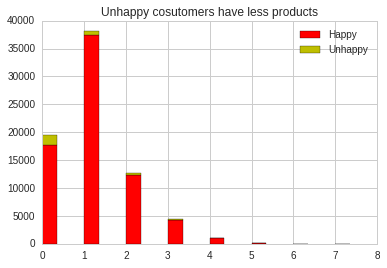

In [123]:
ind0, counts0 = np.unique(train.loc[train.TARGET == 0].num_var4, return_counts=True)
ind1, counts1 = np.unique(train.loc[train.TARGET == 1].num_var4, return_counts=True)
counts1 = np.append(counts1, [0, 0])
width = 0.35

p1 = plt.bar(ind0, counts0, width, color='r')
p2 = plt.bar(ind0, counts1, width, color='y', bottom=counts0)

plt.title('Unhappy cosutomers have less products')
plt.legend((p1[0], p2[0]), ('Happy', 'Unhappy'))

plt.show()

虽然整个数据集中Unhappy的用户连4%都不到，但是从上图我们可以看出，Unhappy的用户大部分都集中在num_var4变量为0或1的地方。

# Var38

In [148]:
train.var38.value_counts().head(15)

117310.979016    14868
451931.220000       16
463625.160000       12
104563.800000       11
288997.440000       11
236690.340000        8
67088.310000         7
128318.520000        7
329603.970000        7
125722.440000        7
104644.410000        7
70813.800000         6
163432.470000        6
105260.880000        6
97639.560000         6
Name: var38, dtype: int64

从上面的统计信息可以看出，Var38变量其中的一个值数量非常多，其它值的数量大约都在20以下。下面，我plot出直方图，看看var38变量的分布是什么样的？

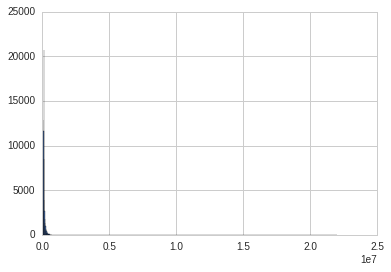

In [149]:
train.var38.hist(bins=1000)
plt.show()

从上图可以看出,var38变量的分布是positive skew, 这个变量很有可能是和金钱相关的。下面，我用log转换一下它的分布，看看是什么样的？

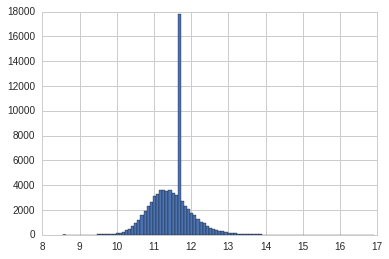

In [155]:
train.var38.map(np.log).hist(bins=100)
plt.show()

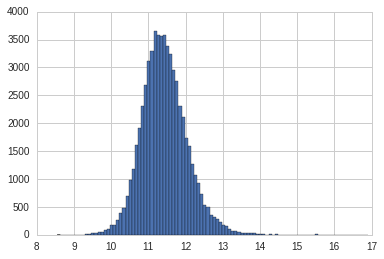

In [157]:
# 这次我们去掉上图中那个数量非常多的值
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100)
plt.show()